# Optical propagation with DHT

_Igor A Andriyash_

**Laboratoire d’Optique Appliquée**

https://github.com/hightower8083/axiprop

## Basics

#### Wave equation for $A(x, y, z, t )$

$$ \frac{1}{c} \; \partial_t^2 A \; - \; \nabla^2 A  \; = \; 0$$

#### Decompose to a series of monochromatic waves

$$ A(x, y, z, t) = \; Re \left\{\sum_{\omega\in \{\omega\} } \hat{A}_\omega(x, y, z ) \; e^{-\mathrm{i} \omega t} \right\}  $$


#### If $\{\omega\}$ corresponds to the orthogonal modes $e^{-\mathrm{i} \omega t}$, we get independent equations for $\hat{A}_\omega(x, y, z )$

$$ -k^2 \; \hat{A}_\omega \; - \; \nabla^2 \hat{A}_\omega  \; = \; 0$$
where $k=\omega/c$

#### Assume cylindric coordinates and decompose to azimuthal modes 

$$  \hat{A}_\omega(x, y, z ) =  \hat{A}_\omega(r, \theta, z ) =  \sum_{m\in \{m\} }  \hat{A}_{\omega,m}(r, z ) e^{-\mathrm{i} m  \theta} $$


#### For integer $m$ we get equations $\hat{A}_{\omega,m}(r, z )$

$$  \; \partial_z^2 \hat{A}_{\omega,m} + \cfrac{1}{r} \partial_r r \partial_r\hat{A}_{\omega,m} - \cfrac{m^2}{r^2} \hat{A}_{\omega,m}  \; = \; -k^2 \; \hat{A}_{\omega,m}$$

#### Decompose to Bessel functions

$$ \hat{A}_{\omega,m}(r, z ) =  \sum_{k_r\in \{k_r^{(m)}\}}  \hat{A}_{\omega,m, k_r^{(m)}}(z) \, J_m\!\! \left(k_r^{(m)} r\right) $$


#### Assuming  $J_m \left(k_r^{(m)} r\right)$ are orthogonal on the base $\{k_r^{(m)}\}$ and some interval $r\in [0, R]$, we get equations for $\hat{A}_{\omega,m, k_r^{(m)}}(z)$

$$  \; \partial_z^2 \hat{A}_{\omega,m, k_r^{(m)}}  = \; -( k^2 - k_r^2) \; \hat{A}_{\omega,m, k_r^{(m)}} $$

#### For the initial value problem with a known $\hat{A}_0 = \hat{A}_{\omega,m, k_r^{(m)}}(z=z_0)$ we get known the propagator solution:

$$ \hat{A}_{\omega,m, k_r^{(m)}}(z) = \hat{A}_0  \, \exp\left(-\mathrm{i}\, (z-z_0)\, \sqrt{k^2 - k_r^2}\right) $$

## Orthogonality of the transverse base functions

#### Want to use the decomposition (or backward DHT)
$$ \hat{A}_{\omega,m}(r, z ) =  \sum_{k_r\in \{k_r^{(m)}\}}  \hat{A}_{\omega,m, k_r^{(m)}}(z) \, J_m\!\! \left(k_r^{(m)} r\right) $$
and see when it is legit.

Consider integral of a decomposed function:
$$ \int_0^R\, r\, dr\, J_m\!\! \left(k_r' r\right) \, \hat{A}_{\omega,m}(r, z) =  \sum_{k_r\in \{k_r\}}  \hat{A}_{\omega,m, k_r}(z) \, \int_0^R\, r\, dr\, J_m\!\! \left(k_r' r\right) \, J_m\!\! \left(k_r r\right)
$$

For $\alpha$ being roots of $J_m$,  $ \int_0^1\, \rho \,d\rho \, J_m(\alpha \rho) J_m(\alpha' \rho) = \cfrac{\delta_{\alpha, \alpha'}}{2} [J_{m+1}(\alpha)]^2$
so for $k_r = \alpha/R$ this leads to
$$ \int_0^R\, r\, dr\, J_m\!\! \left(k_r' r\right) \, \hat{A}_{\omega,m}(r, z) = \cfrac{R^2}{2}  \, \hat{A}_{\omega,m, k_r'}(z) \; \; \left[J_{m+1}(k_r' R)\right]^2$$


#### We find the forward transform:
$$ \hat{A}_{\omega,m, k_r}(z)  = \cfrac{2}{[R\, J_{m+1}(k_r R)]^2} \int_0^R\, r\, dr\, J_m\!\! \left(k_r r\right) \, \hat{A}_{\omega,m}(r, z)$$

Corresponds to the (bounded) Hankel transform with normalization.

#### We can use backward DHT matrix:
$$ M_{ij} =  J_m\!\! \left(\alpha_j  \rho_i) \right) $$
or a one with normalization (simillar to FBPIC)
$$ M_{ij} =  \cfrac{2 J_m\!\! \left(\alpha_j  \rho_i \right)  }{[\, J_{m+1}(\alpha_j)]^2} $$

## Tuning DHT 

For a custom $r = R \alpha/\alpha_{N+1}$ a symmetric transform with $\det(M)\simeq 1$ can be developed (Guizar-Sicairos, Gutiérrez-Vega):
$$ M_{ij} = \cfrac{2\, J_m(\alpha_i \alpha_j / \alpha_{N+1})} { \alpha_{N+1} |J_{m+1}(\alpha_i)| \;| J_{m+1}(\alpha_j)|}$$

#### Ideally we should be free in choice of $r$-grid
Will consider an axis $r_j = R \, (d + j) \,/\, N_r$, for $j = 0, 1, ..., N_r-1$, with a _tuning_ coefficient $d\in[0,1]$
(One metrics of transform consistensy is $\det(M)$ -- closer to 1 is better)

Lets test differential property of m=0 DHT:

$$ d_r A = iDHT^{(1)}[\,  -\alpha^{(0)} DHT^{(0)}[A] \, ] $$

Consider a signal sampled with $N_r = 512$:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scc
import scipy.special as scf

d_ax = np.r_[0:1:64j][:-1]
m = 0

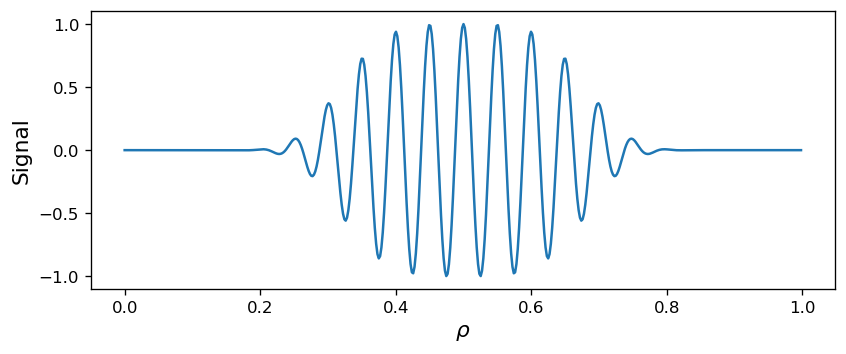

In [2]:
Nr = 512

rho0 = 0.5
Lrho = 0.2
n_ord = 4
freq = 20
rho = np.linspace(0, 1, Nr, endpoint=False)
dr = rho[[0,1]].ptp()

fu_test = np.exp(-((rho-rho0)/Lrho)**n_ord) * np.cos(2*np.pi * freq * rho)
df_analyt = -2*np.pi * freq * np.exp(-((rho-rho0)/Lrho)**n_ord) * np.sin(2*np.pi * freq * rho) \
            - np.exp(-((rho-rho0)/Lrho)**n_ord) * np.cos(2*np.pi * freq * rho) \
              * n_ord * ((rho-rho0)/Lrho)**(n_ord-1) / Lrho

plt.figure(dpi=120, figsize=(8,3))

plt.plot(rho, fu_test)
plt.xlabel(r'$\rho$',size=13)
plt.ylabel('Signal',size=13);

In [3]:
alpha = scf.jn_zeros(0, Nr)
k_fft = 2 * np.pi * np.fft.fftfreq(Nr, dr)

err_fdtd_val = []
err_fft_val = []
err_dht_val = []

for d in d_ax:  
    rho = np.linspace(0, 1, Nr, endpoint=False)
    dr = rho[[0,1]].ptp()
    rho += d * dr

    fu_test = np.exp(-((rho-rho0)/Lrho)**n_ord) * np.cos(2*np.pi * freq * rho)
    df_analyt = -2*np.pi * freq * np.exp(-((rho-rho0)/Lrho)**n_ord) * np.sin(2*np.pi * freq * rho) \
            - np.exp(-((rho-rho0)/Lrho)**n_ord) * np.cos(2*np.pi * freq * rho) \
              * n_ord * ((rho-rho0)/Lrho)**(n_ord-1) / Lrho
    
    iDHT = scf.jn(0, alpha[None,:] * rho[:, None])
    DHT = np.linalg.inv(iDHT)
    iDHT = scf.jn(1, alpha[None,:] * rho[:, None])
    
    df_dht = iDHT.dot(- alpha * DHT.dot(fu_test))

    err_dht_val.append(np.abs(df_analyt - df_dht).mean()/np.abs(df_analyt).mean())

df_fdtd = np.gradient(fu_test, dr)
df_fft = np.real(np.fft.ifft(1j * k_fft * np.fft.fft(fu_test)))

err_fdtd_val = np.abs(df_analyt - df_fdtd).mean()/np.abs(df_analyt).mean() * np.ones_like(d_ax)
err_fft_val = np.abs(df_analyt - df_fft).mean()/np.abs(df_analyt).mean() * np.ones_like(d_ax)

### Errors for derivatives computed via FD, FFT and DHT

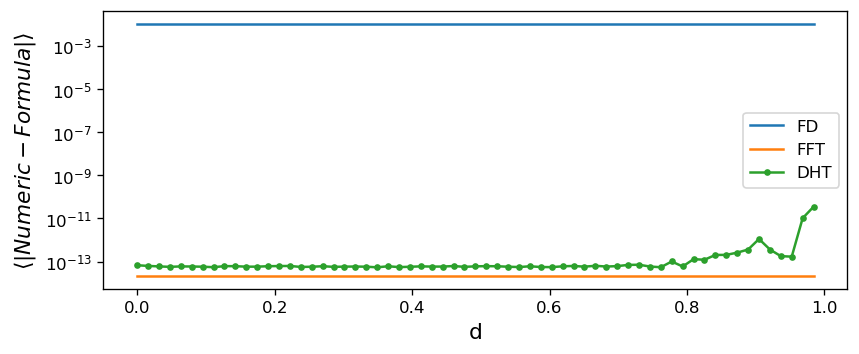

In [4]:
plt.figure(dpi=120, figsize=(8,3))

plt.plot(d_ax, err_fdtd_val, label='FD')
plt.plot(d_ax, err_fft_val, label='FFT')
plt.semilogy(d_ax, err_dht_val,'.-', label='DHT')
plt.legend()

plt.xlabel(r'd',size=13)
plt.ylabel(r'$\langle | Numeric - Formula |\rangle$',size=13);

### Distribution of error

(0.0, 1.049871341765873)

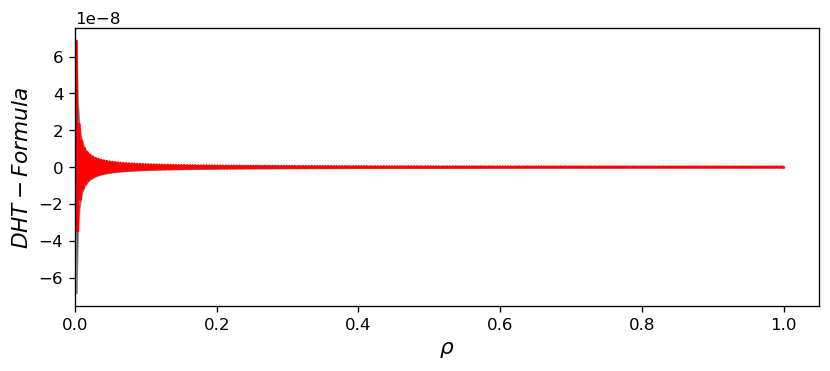

In [5]:
plt.figure(dpi=120, figsize=(8,3))

plt.fill_between(rho, np.abs(df_dht - df_analyt), -np.abs(df_dht - df_analyt), alpha=0.4, color='k')
plt.plot(rho, df_dht - df_analyt, c='r')
plt.xlabel(r'$\rho$',size=13)
plt.ylabel(r'$DHT - Formula$',size=13);
plt.xlim(0,)

### Or a non-periodic signal

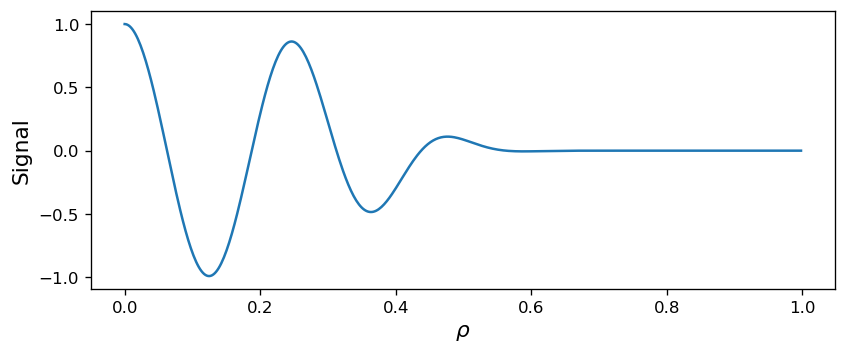

In [6]:
Nr = 512

rho0 = 0
Lrho = 0.4
n_ord = 4
freq = 4
rho = np.linspace(0, 1, Nr, endpoint=False)

fu_test = np.exp(-((rho-rho0)/Lrho)**n_ord) * np.cos(2*np.pi * freq * rho)
df_analyt = -2*np.pi * freq * np.exp(-((rho-rho0)/Lrho)**n_ord) * np.sin(2*np.pi * freq * rho) \
            - np.exp(-((rho-rho0)/Lrho)**n_ord) * np.cos(2*np.pi * freq * rho) \
              * n_ord * ((rho-rho0)/Lrho)**(n_ord-1) / Lrho

plt.figure(dpi=120, figsize=(8,3))

plt.plot(rho, fu_test)
plt.xlabel(r'$\rho$',size=13)
plt.ylabel('Signal',size=13);

In [7]:
alpha = scf.jn_zeros(0, Nr)
k_fft = 2 * np.pi * np.fft.fftfreq(Nr, dr)

err_fdtd_val = []
err_fft_val = []
err_dht_val = []

for d in d_ax:  
    rho = np.linspace(0, 1, Nr, endpoint=False)
    dr = rho[[0,1]].ptp()
    rho += d * dr

    fu_test = np.exp(-((rho-rho0)/Lrho)**n_ord) * np.cos(2*np.pi * freq * rho)
    df_analyt = -2*np.pi * freq * np.exp(-((rho-rho0)/Lrho)**n_ord) * np.sin(2*np.pi * freq * rho) \
            - np.exp(-((rho-rho0)/Lrho)**n_ord) * np.cos(2*np.pi * freq * rho) \
              * n_ord * ((rho-rho0)/Lrho)**(n_ord-1) / Lrho
    
    iDHT = scf.jn(0, alpha[None,:] * rho[:, None])
    DHT = np.linalg.inv(iDHT)
    iDHT = scf.jn(1, alpha[None,:] * rho[:, None])
    
    df_dht = iDHT.dot(- alpha * DHT.dot(fu_test))

    err_dht_val.append(np.abs(df_analyt - df_dht).mean()/np.abs(df_analyt).mean())

df_fdtd = np.gradient(fu_test, dr)
df_fft = np.real(np.fft.ifft(1j * k_fft * np.fft.fft(fu_test)))

err_fdtd_val = np.abs(df_analyt - df_fdtd).mean()/np.abs(df_analyt).mean() * np.ones_like(d_ax)
err_fft_val = np.abs(df_analyt - df_fft).mean()/np.abs(df_analyt).mean() * np.ones_like(d_ax)

### Errors for derivatives computed via FD, FFT and DHT

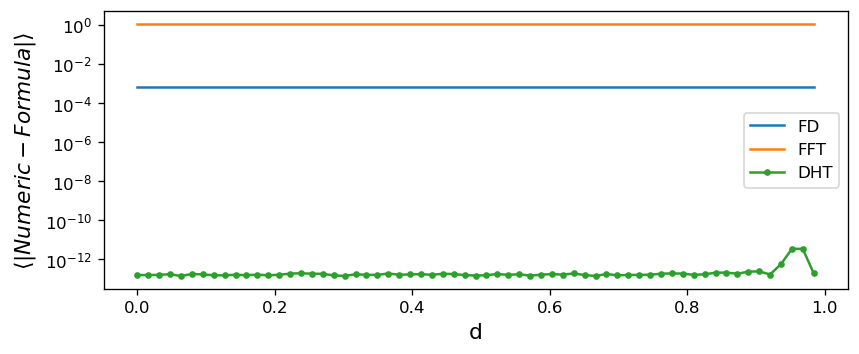

In [8]:
plt.figure(dpi=120, figsize=(8,3))

plt.plot(d_ax, err_fdtd_val, label='FD')
plt.plot(d_ax, err_fft_val, label='FFT')
plt.semilogy(d_ax, err_dht_val,'.-', label='DHT')
plt.legend()

plt.xlabel(r'd',size=13)
plt.ylabel(r'$\langle | Numeric - Formula |\rangle$',size=13);

### Distribution of error

(0.0, 1.049871341765873)

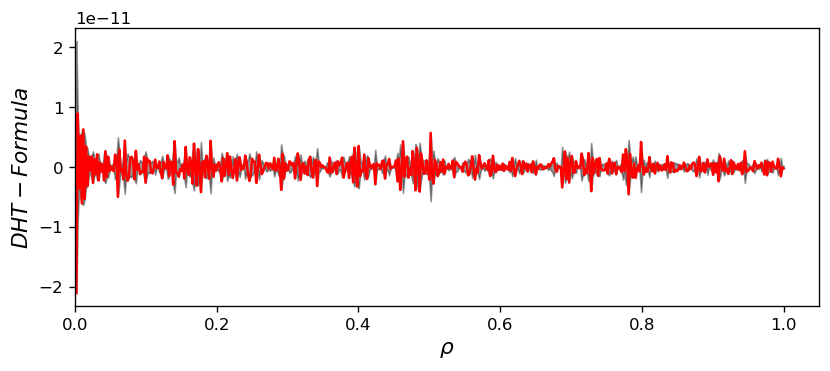

In [9]:
plt.figure(dpi=120, figsize=(8,3))

plt.fill_between(rho, np.abs(df_dht - df_analyt), -np.abs(df_dht - df_analyt), alpha=0.4, color='k')
plt.plot(rho, df_dht - df_analyt, c='r')
plt.xlabel(r'$\rho$',size=13)
plt.ylabel(r'$DHT - Formula$',size=13);
plt.xlim(0,)

In [10]:
series_vals_iDHT = []

Nr_series = [64, 128, 256]

for Nr in Nr_series:
    vals_iDHT = []
    alpha = scf.jn_zeros(m, Nr)
    for d in d_ax:    
        rho = np.linspace(0, 1, Nr, endpoint=False)
        dr = rho[[0,1]].ptp()
        rho += d * dr
        iDHT = scf.jn(m, alpha[None,:] * rho[:, None])
        vals_iDHT.append(np.linalg.det(iDHT))
    series_vals_iDHT.append(vals_iDHT)

d_max = d_ax[series_vals_iDHT[0]==max(series_vals_iDHT[0])]

### Determinant 

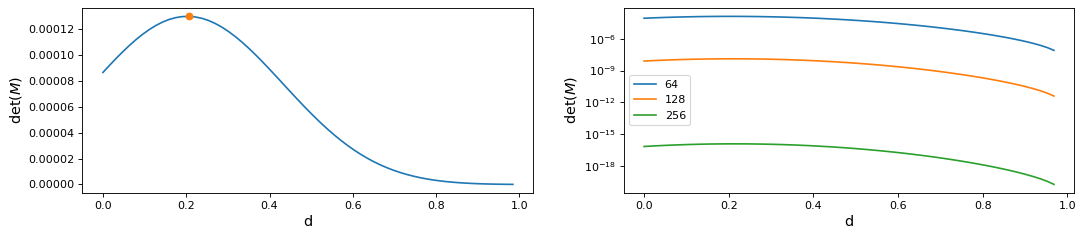

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, dpi=80, figsize=(16,3))

ax1.plot(d_ax, series_vals_iDHT[0])
ax1.plot(d_max, max(series_vals_iDHT[0]), 'o')

for vals_iDHT in series_vals_iDHT:
    ax2.semilogy(d_ax[:-1], vals_iDHT[:-1])
plt.legend(Nr_series)

ax1.set_xlabel('d',size=13)
ax1.set_ylabel(r'$\det(M)$',size=13);

ax2.set_xlabel('d',size=13)
ax2.set_ylabel(r'$\det(M)$',size=13);
# print(f'd = {d_max[0]:g}')